# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "afrasaboobackerp"
kaggle_key = "15859931801dc9a24982fbde863355de"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 68.1MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('/content/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train = train.drop(columns=['casual', 'registered'])
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train, time_limit=600,
                             presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230606_184320/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230606_184320/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.118942      32.350498  556.910509                0.001059           0.326913            3       True         13
1   RandomForestMSE_BAG_L2  -53.456949      24.067576  436.527609                0.906628          44.844980            2       True         12
2          LightGBM_BAG_L2  -55.001598      23.582039  428.489779                0.421091          36.807150            2       True         11
3        LightGBMXT_BAG_L2  -60.332795      31.021721  474.931467                7.860773          83.248838            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061       0.068346    0.057381                0.068346           0.057381            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.069667    1.021446         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.71812687733896

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions

0        24.126625
1        42.795876
2        46.516136
3        48.195526
4        51.434601
           ...    
6488    161.067322
6489    161.118744
6490    157.369751
6491    154.005219
6492    151.121735
Name: count, Length: 6493, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.506393
std        89.955223
min         3.417208
25%        19.701641
50%        63.291039
75%       166.996796
max       365.893127
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
num_negative_values = (predictions < 0).sum().sum()
num_negative_values

0

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission['datetime'] = test['datetime']
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 65.1kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-06-06 19:00:16  first raw submission               complete  1.80288      1.80288       
submission_new_hpo.csv       2023-06-06 17:53:05  new features with hyperparameters  complete  0.55740      0.55740       
submission_new_features.csv  2023-06-06 17:38:40  new features                       complete  0.63634      0.63634       
submission.csv               2023-06-06 17:19:01  first raw submission               complete  1.79594      1.79594       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

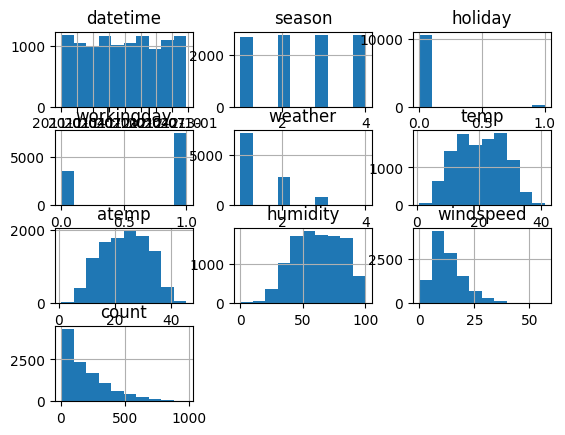

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
train['Year'] = train['datetime'].dt.year
train['Month'] = train['datetime'].dt.month
train['Day'] = train['datetime'].dt.day
train['Hour'] = train['datetime'].dt.hour

test['Year'] = test['datetime'].dt.year
test['Month'] = test['datetime'].dt.month
test['Day'] = test['datetime'].dt.day
test['Hour'] = test['datetime'].dt.hour
train.head()
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Year,Month,Day,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

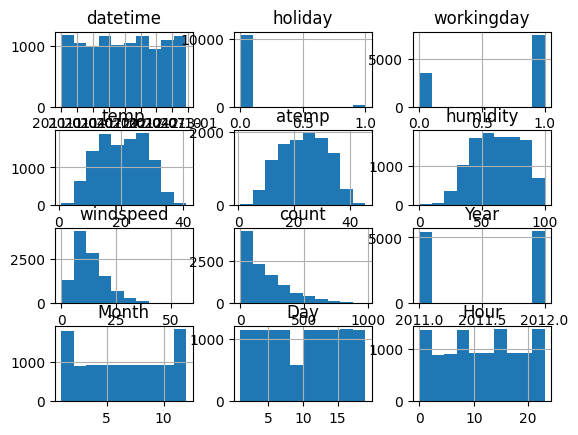

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train, time_limit=600,
                         presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230606_190207/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230606_190207/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.335978      25.706091  572.850888                0.001059           0.417489            3       True         13
1          LightGBM_BAG_L2  -30.558902      22.866322  420.337522                0.378548          37.439705            2       True         10
2          CatBoost_BAG_L2  -31.051735      23.029320  433.649009                0.541546          50.751193            2       True         12
3        LightGBMXT_BAG_L2  -31.274362      23.846333  427.552596                1.358559          44.654780            2       True          9
4   RandomForestMSE_BAG_L2  -31.672755      23.426379  439.587720                0.938606          56.689904            2       True         11
5      WeightedEnsemble_L2  -32.234277      21.858769  369.805561         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.30612025079756,
  'CatBoost_BAG_L1': -35.000378307154975,
  'ExtraTrees

In [ ]:
predictions_new = predictor_new_features.predict(test)
predictions_new

0        15.429430
1        11.192017
2        10.440520
3         9.353924
4         8.240405
           ...    
6488    295.579285
6489    211.223511
6490    154.987183
6491    111.588455
6492     72.517509
Name: count, Length: 6493, dtype: float32

In [ ]:
predictions_new.describe()

count    6493.000000
mean      163.081284
std       143.176254
min         2.899641
25%        50.414772
50%       125.630966
75%       233.486786
max       824.469238
Name: count, dtype: float64

In [ ]:
num_negative_values_new = (predictions_new < 0).sum().sum()
print(num_negative_values_new)

0


In [ ]:
# Remember to set all negative values to zero

predictions_new[predictions_new < 0] = 0

In [ ]:
# Same submitting predictions
submission_new_features = pd.DataFrame()
submission_new_features['datetime'] = test['datetime']
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:03<00:00, 58.0kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-06 19:14:26  new features                       complete  0.62040      0.62040       
submission.csv               2023-06-06 19:00:16  first raw submission               complete  1.80288      1.80288       
submission_new_hpo.csv       2023-06-06 17:53:05  new features with hyperparameters  complete  0.55740      0.55740       
submission_new_features.csv  2023-06-06 17:38:40  new features                       complete  0.63634      0.63634       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

# Define the hyperparameters for NN with dropout, activation function, and learning rate
nn_hyperparameters = {
    'num_epochs': 10,
    'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=1e-3),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
    'activation': ag.space.Categorical('relu', 'tanh')
}

# Define the hyperparameters for GBM with number of boosting rounds and learning rate
gbm_hyperparameters = {
    'num_boost_round' : ag.space.Int(lower=100, upper=500, default=100),
    'num_leaves' : ag.space.Int(lower=6, upper=10),
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=1e-3)
}
#define xgb hyperparameters
xgb_hyperparameters = {
    'n_estimators' : ag.space.Int(lower=100, upper=500, default=100),
    'max_depth' : ag.space.Int(lower=6, upper=10, default=6),
    'eta' : ag.space.Real(lower=0.01, upper=0.3, log=True)
}

# Set the hyperparameter tune kwargs for Hyperband search strategy
hyperparameter_tune_kwargs = {
    'searcher': 'auto',
    'max_trials': 15,
    'scheduler': 'local'
}

# Fit the TabularPredictor with NN and GBM hyperparameters, including dropout, activation function, and Hyperband search strategy
predictor_new_hpo = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    problem_type='regression',
    ).fit(
    train,
    time_limit=600,
    hyperparameters={
        'NN': nn_hyperparameters,
        'GBM': gbm_hyperparameters,
        'XGB' : xgb_hyperparameters
    },
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    presets='best_quality'
)



No path specified. Models will be saved in: "AutogluonModels/ag-20230606_191440/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230606_191440/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11043.52 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -34.113075       0.009124  105.219887                0.008675           0.891977            2       True          7
1   WeightedEnsemble_L3  -34.740845       0.002690  334.444297                0.001318           1.054467            3       True         12
2     XGBoost_BAG_L2/T1  -34.919996       0.001061  241.173288                0.000142          29.991919            2       True         10
3     XGBoost_BAG_L1/T3  -35.126929       0.000157   33.366094                0.000157          33.366094            1       True          6
4     XGBoost_BAG_L1/T2  -35.251587       0.000150   44.253452                0.000150          44.253452            1       True          5
5     XGBoost_BAG_L2/T2  -35.259903       0.001079  260.965571                0.000160      

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -171.4454523315753,
  'LightGBM_BAG_L1/T2': -82.91315413120766,
  'LightGBM_BAG_L1/T3': -96.44640803546979,
  'XGBoost_BAG_L1/T1': -38.06999646985297,
  'XGBoost_BAG_L1/T2': -35.251587056993216,
  'XGBoost_BAG_L1/T3': -35.12692862393618,
  'WeightedEnsemble_L2': -34.11307533514884,
  'LightGBM_BAG_L2/T1

In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [ ]:
predictions_new_hpo.describe()

count    6493.000000
mean      191.010391
std       171.119354
min       -13.591940
25%        48.059174
50%       150.577164
75%       283.495392
max       888.849487
Name: count, dtype: float64

In [ ]:
# Remember to set all negative values to zero
num_negative_values_new_hpo = (predictions_new_hpo < 0).sum().sum()
print(num_negative_values_new)

0


In [ ]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.DataFrame()
submission_new_hpo['datetime'] = test['datetime']
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:03<00:00, 60.5kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-06 19:25:32  new features with hyperparameters  complete  0.55740      0.55740       
submission_new_features.csv  2023-06-06 19:14:26  new features                       complete  0.62040      0.62040       
submission.csv               2023-06-06 19:00:16  first raw submission               complete  1.80288      1.80288       
submission_new_hpo.csv       2023-06-06 17:53:05  new features with hyperparameters  complete  0.55740      0.55740       


#### New Score of `0.55740`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

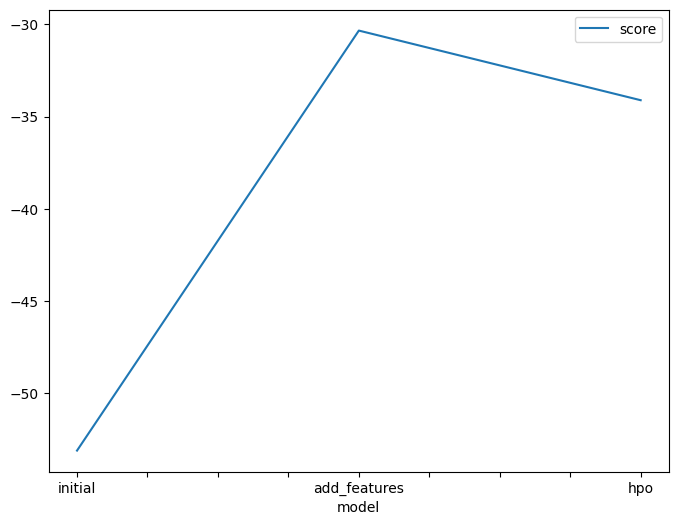

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.118942, -30.335978 , -34.113075 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

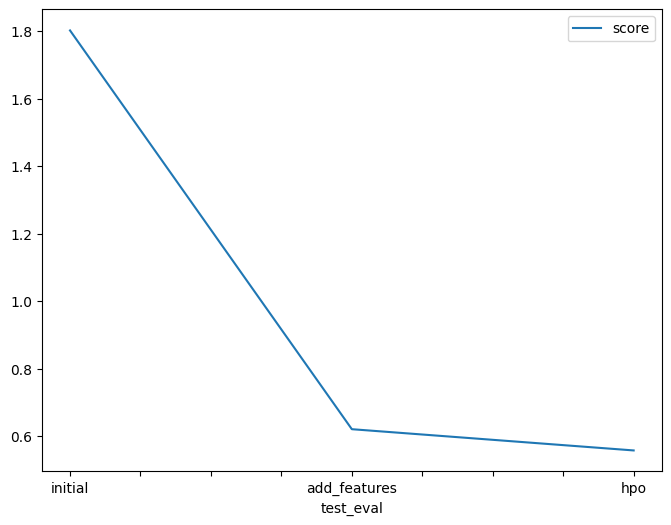

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80288,0.62040,0.55740]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
table_df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [
        'default_vals',
        'default_vals',
        'GBM (Light gradient boosting) : num_boost_round: [lower=100, upper=500], num_leaves:[lower=6, upper=10], learning_rate:[lower=0.01, upper=0.3, log scale]'
    ],
    "hpo2": [
        'default_vals',
        'default_vals',
        'XGB (XGBoost): n_estimators : [lower=100, upper=500], max_depth : [lower=6, upper=10], eta (learning_rate) : [lower=0.01, upper=0.3, log scale]'
    ],
    "hpo3": [
        'default_vals',
        'default_vals',
        'NN (neural network) = num_epochs: 10,layers:([100], [1000], [200, 100], [300, 200, 100]),learning_rate:[lower=0.0001,upper=0.01],dropout_prob:[0.0, 0.5],activation_fun:[relu, tanh]'
    ],
    "score": [1.80288,0.62040,0.55740]
})

table_df



,model,hpo1,hpo2,hpo3,score
0,initial,default_vals,default_vals,default_vals,1.79594
1,add_features,default_vals,default_vals,default_vals,0.63634
2,hpo,"GBM (Light gradient boosting) : num_boost_round: [lower=100, upper=500], num_leaves:[lower=6, upper=10], learning_rate:[lower=0.01, upper=0.3, log scale]","XGB (XGBoost): n_estimators : [lower=100, upper=500], max_depth : [lower=6, upper=10], eta (learning_rate) : [lower=0.01, upper=0.3, log scale]","NN (neural network) = num_epochs: 10,layers:([100], [1000], [200, 100], [300, 200, 100]),learning_rate:[lower=0.0001,upper=0.01],dropout_prob:[0.0, 0.5],activation_fun:[relu, tanh]",0.55740
